In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

#import necessory libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import glob
import os
from scipy.interpolate import interp1d
from datetime import datetime, timedelta
from datetime import timedelta
import networkx as nx
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

Loading the unified dataset for training, testing and validation

In [5]:
train = pd.read_csv('/content/drive/MyDrive/university of essex/data science/ds_assignment/unified dataset/train.csv', index_col=0)
#Start and end of training set:	 2000-01-01 00:00:00 2016-10-22 06:00:00

validation = pd.read_csv('/content/drive/MyDrive/university of essex/data science/ds_assignment/unified dataset/validation.csv', index_col=0)
#Start and end of validation set:	 2016-10-22 07:00:00 2020-05-29 19:00:00

test = pd.read_csv('/content/drive/MyDrive/university of essex/data science/ds_assignment/unified dataset/test.csv', index_col=0)
#Start and end of test set:	 2020-05-29 20:00:00 2024-01-05 09:00:00

In [6]:
validation

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy,windpower,solarpower
2016-10-22 07:00:00,5.90,5.6,97.92,0.075,100.0,1.0,0.0,0.0,9.9,333.0,1016.60,73.8,0.2,0.0,0.0,354.927806,0.0
2016-10-22 08:00:00,6.10,5.9,98.83,0.000,0.0,0.0,0.0,0.0,10.6,343.0,1016.65,57.6,41.1,0.0,0.1,435.664363,2184.0
2016-10-22 09:00:00,7.30,7.0,98.21,0.000,0.0,0.0,0.0,0.0,10.7,340.0,1016.70,73.1,141.7,1.0,0.5,448.111174,10920.0
2016-10-22 10:00:00,9.10,8.2,94.44,0.000,0.0,0.0,0.0,0.0,13.3,358.0,1016.60,20.0,279.9,3.0,1.0,860.576264,21840.0
2016-10-22 11:00:00,10.65,9.1,86.70,0.000,0.0,0.0,0.0,0.0,13.3,6.0,1016.50,10.0,382.8,4.0,1.4,860.576264,30576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29 15:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000,0.0
2020-05-29 16:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000,0.0
2020-05-29 17:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000,0.0
2020-05-29 18:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000,0.0


#Prediction for solar power

In [7]:
def feature(data):
  features = data.iloc[:, :-2]
  return features

def label(data):
  labels = data['solarpower']
  return labels

##Seperating features and labels for machine learning

In [8]:
train_x = feature(train)
train_y = label(train)
validation_x=feature(validation)
validation_y=label(validation)
test_x=feature(test)
test_y=label(test)

In [9]:
train_x

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
2000-01-01 00:00:00,5.9,5.7,98.63,0.0,0.0,0.0,0.0,0.0,9.4,210.0,1020.6,0.0,0.0,0.0,0.0
2000-01-01 01:00:00,6.4,5.8,96.12,0.0,0.0,0.0,0.0,0.0,15.1,233.0,1020.4,100.0,0.0,0.0,0.0
2000-01-01 02:00:00,6.6,6.4,98.31,0.0,0.0,0.0,0.0,0.0,13.9,238.0,1020.5,100.0,0.0,0.0,0.0
2000-01-01 03:00:00,7.2,6.5,95.92,0.0,0.0,0.0,0.0,0.0,14.1,232.0,1020.5,100.0,0.0,0.0,0.0
2000-01-01 04:00:00,7.2,6.6,96.38,0.0,0.0,0.0,0.0,0.0,14.3,242.0,1020.4,100.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-22 02:00:00,7.5,7.3,98.39,0.0,0.0,0.0,0.0,0.0,10.3,345.0,1017.5,78.4,0.0,0.0,0.0
2016-10-22 03:00:00,7.1,6.9,98.61,0.0,0.0,0.0,0.0,0.0,9.2,333.0,1017.4,53.9,0.0,0.0,0.0
2016-10-22 04:00:00,7.3,6.9,96.85,0.0,0.0,0.0,0.0,0.0,10.8,338.0,1017.0,46.0,0.0,0.0,0.0
2016-10-22 05:00:00,6.8,6.4,97.03,0.0,0.0,0.0,0.0,0.0,11.8,345.0,1016.7,56.3,0.0,0.0,0.0


##Machine learning models

Implementing Linear Regression, Random forest, Gradient Boosting, XGBRegressor machine learning algorithms

For training and validation set.

In [10]:
models = {
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Random Forest": make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)),
    "Gradient Boosting": make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, random_state=42)),
    "XGBRegressor": make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, random_state=42))
}

# Evaluate models
for name, model in models.items():
    model.fit(train_x, train_y)
    y_pred = model.predict(validation_x)
    r2 = r2_score(validation_y, y_pred)
    print(f"{name} R2 Score:", r2)

Linear Regression R2 Score: 1.0
Random Forest R2 Score: 0.9999799561382159
Gradient Boosting R2 Score: 0.9999801383575988
XGBRegressor R2 Score: 0.9999801769039081


For testing set

In [11]:
models = {
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Random Forest": make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)),
    "Gradient Boosting": make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, random_state=42)),
    "XGBRegressor": make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, random_state=42))
}

# Evaluate models
for name, model in models.items():
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    r2 = r2_score(test_y, y_pred)
    print(f"{name} R2 Score:", r2)

Linear Regression R2 Score: 1.0
Random Forest R2 Score: 0.9999242086839866
Gradient Boosting R2 Score: 0.9999248701101395
XGBRegressor R2 Score: 0.9999254185771873


##Neural network models

LSTM

In [12]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(validation_x)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, train_y, epochs=5, batch_size=32, verbose=1)

# Predict on validation set
y_pred = model.predict(X_test_reshaped)

# Calculate R^2 score
r2 = r2_score(validation_y, y_pred)
print("LSTM R2 Score:", r2)

Epoch 1/5
4605/4605 [==============================] - 18s 3ms/step - loss: 116560192.0000
Epoch 2/5
4605/4605 [==============================] - 14s 3ms/step - loss: 115581056.0000
Epoch 3/5
4605/4605 [==============================] - 14s 3ms/step - loss: 114625352.0000
Epoch 4/5
4605/4605 [==============================] - 16s 4ms/step - loss: 113679448.0000
Epoch 5/5
987/987 [==============================] - 2s 1ms/step
LSTM R2 Score: -0.21754184176720437


CNN

In [13]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(validation_x)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, train_y, epochs=5, batch_size=32, verbose=1)

# Predict on validation set
y_pred = model.predict(X_test_reshaped)

# Calculate R^2 score
r2 = r2_score(validation_y, y_pred)
print("CNN R2 Score:", r2)

Epoch 1/5
4605/4605 [==============================] - 10s 2ms/step - loss: 28828234.0000
Epoch 2/5
4605/4605 [==============================] - 9s 2ms/step - loss: 648415.6250
Epoch 3/5
4605/4605 [==============================] - 8s 2ms/step - loss: 541860.9375
Epoch 4/5
4605/4605 [==============================] - 10s 2ms/step - loss: 508547.5938
Epoch 5/5
987/987 [==============================] - 1s 1ms/step
CNN R2 Score: 0.9934886428815028


By comparing all the models Linear regression gives the best accuracy.

Using Linear regression model predicting the solar power for next 24 hours.

Predicted solar power values for the next 24 hours:
[4.36800000e+03 4.36800000e+03 6.55200000e+03 6.55200000e+03
 4.36800000e+03 2.18400000e+03 3.10965454e-12 4.82451521e-12
 4.77783534e-12 5.49927321e-12 4.67479918e-12 6.16582842e-12
 3.89734115e-12 7.07041342e-12 5.00312726e-12 4.32498971e-12
 4.44669033e-12 1.69734707e-12 1.60794854e-12 1.98371945e-12
 1.66525420e-12 2.07515056e-12 1.71053314e-12 1.36078374e-13]


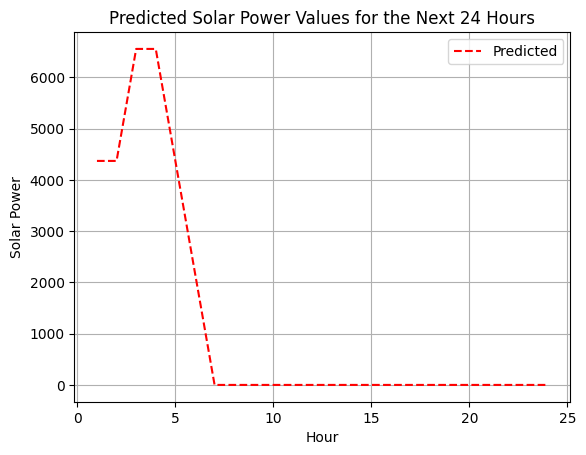

In [14]:
model = LinearRegression()
model.fit(train_x, train_y)

# Predicting the solar power values for the next 24 hours
# Assuming X_test contains the latest available data
next_24_hours_predictions_for_solar = model.predict(test_x.tail(24))

# Print the predictions
print("Predicted solar power values for the next 24 hours:")
print(next_24_hours_predictions_for_solar)
next_24_hours_range = range(1, 25)

# Plot the actual solar power values (if available)
# Assuming test_y contains the actual solar power values for the next 24 hours
# Uncomment the lines below if you have actual values to compare with predictions
# plt.plot(next_24_hours_range, test_y.tail(24), label='Actual')

# Plot the predicted solar power values
plt.plot(next_24_hours_range, next_24_hours_predictions_for_solar, label='Predicted', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Solar Power')
plt.title('Predicted Solar Power Values for the Next 24 Hours')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

#Prediction for wind power

In [15]:
def label(data):
  labels = data['windpower']
  return labels

In [16]:
train_yy = label(train)
validation_yy=label(validation)
test_yy=label(test)

In [17]:
test_yy

2020-05-29 20:00:00       0.000000
2020-05-29 21:00:00       0.000000
2020-05-29 22:00:00       0.000000
2020-05-29 23:00:00       0.000000
2020-05-30 00:00:00       0.000000
                          ...     
2024-01-05 05:00:00    7690.625913
2024-01-05 06:00:00    9486.577826
2024-01-05 07:00:00    8116.212335
2024-01-05 08:00:00    7944.142953
2024-01-05 09:00:00    7607.334663
Name: windpower, Length: 31574, dtype: float64

##Machine learning

Implementing Linear Regression, Random forest, Gradient Boosting, XGBRegressor machine learning algorithms

For training and validation set

In [18]:
models = {
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Random Forest": make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)),
    "Gradient Boosting": make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, random_state=42)),
    "XGBRegressor": make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, random_state=42))
}

# Evaluate models
for name, model in models.items():
    model.fit(train_x, train_yy)
    y_pred = model.predict(validation_x)
    r2 = r2_score(validation_yy, y_pred)
    print(f"{name} R2 Score:", r2)

Linear Regression R2 Score: 0.6649255977729217
Random Forest R2 Score: 0.9999685463222966
Gradient Boosting R2 Score: 0.999879243842535
XGBRegressor R2 Score: 0.9663069660688788


For testing set

In [19]:
models = {
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Random Forest": make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)),
    "Gradient Boosting": make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, random_state=42)),
    "XGBRegressor": make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, random_state=42))
}

# Evaluate models
for name, model in models.items():
    model.fit(train_x, train_yy)
    y_pred = model.predict(test_x)
    r2 = r2_score(test_yy, y_pred)
    print(f"{name} R2 Score:", r2)

Linear Regression R2 Score: 0.6358113434743289
Random Forest R2 Score: 0.9998504683716074
Gradient Boosting R2 Score: 0.9998439300470966
XGBRegressor R2 Score: 0.9415142979403472


By comparing all the models random forest gives the best accuracy.

Using random forest model predicting the solar power for next 24 hours.

Predicted wind power values for the next 24 hours:
[2728.41330834 2792.8197393  3060.88507844 1161.75897787 -563.74802896
 -408.132931    799.55839834  731.99550738 2217.66348372 2358.76576236
 4149.65362455 3647.39439611 2056.85718093 1868.86299678 1763.70077233
 1302.65742786  940.66474142 4433.23211609 7100.21581083 7708.13277037
 8591.41676242 7992.35020152 7944.58034752 7719.18786382]


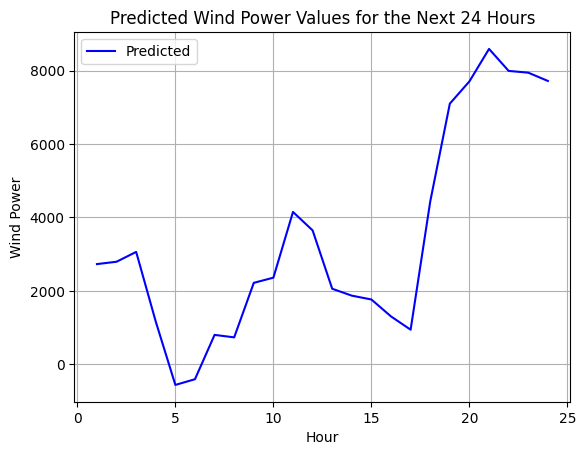

In [20]:
model = LinearRegression()
model.fit(train_x, train_yy)

# Predicting the solar power values for the next 24 hours
# Assuming X_test contains the latest available data
next_24_hours_predictions_for_wind = model.predict(test_x.tail(24))

# Print the predictions
print("Predicted wind power values for the next 24 hours:")
print(next_24_hours_predictions_for_wind)

next_24_hours_range = range(1, 25)

# Plot the predicted wind power values
plt.plot(next_24_hours_range, next_24_hours_predictions_for_wind, label='Predicted', color='blue', linestyle='-')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Wind Power')
plt.title('Predicted Wind Power Values for the Next 24 Hours')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

[7096.41330834 7160.8197393  9612.88507844 7713.75897787 3804.25197104
 1775.867069    799.55839834  731.99550738 2217.66348372 2358.76576236
 4149.65362455 3647.39439611 2056.85718093 1868.86299678 1763.70077233
 1302.65742786  940.66474142 4433.23211609 7100.21581083 7708.13277037
 8591.41676242 7992.35020152 7944.58034752 7719.18786382]


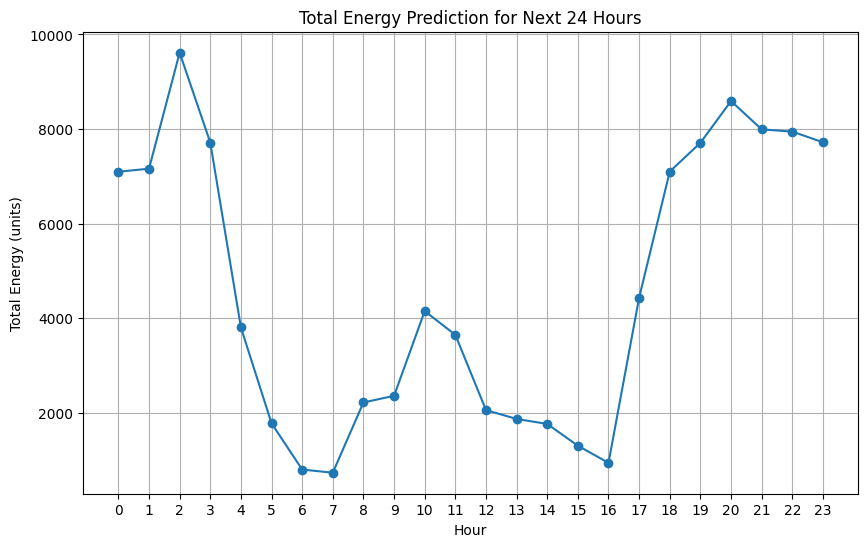

In [21]:
total_energy_for_24_hours = next_24_hours_predictions_for_wind + next_24_hours_predictions_for_solar
print(total_energy_for_24_hours)

plt.figure(figsize=(10, 6))
plt.plot(range(24), total_energy_for_24_hours, marker='o', linestyle='-')
plt.title('Total Energy Prediction for Next 24 Hours')
plt.xlabel('Hour')
plt.ylabel('Total Energy (units)')
plt.grid(True)
plt.xticks(range(24))
plt.show()

In [22]:
overall_energy=total_energy_for_24_hours.sum()
print(overall_energy)

110490.88630834171


#How much electricity had been consumed by the colchester for 2023

For the year 2019, the electricity consumption was:
Scope 2: 837.72 tonnes of CO2e
Scope 3 (Electricity transmission & distribution losses): 76.63 tonnes of CO2e
Total electricity consumption for 2023: 837.72 + 76.63 = 914.35 tonnes of CO2e. Which is 1825927.52 kilowatts This had mentioned in https://www.colchester.gov.uk/sustainability/our-emissions/?id=&page=emissions--monitoring website. This is a government website.

1825927.52 kilowatts energy consumed for one year then for one day 5000.08 kilowatts is consumed

#Identifying surplus energy for next 24 hours or not.

In [23]:
energy_consumed = 5000.08 #for one day
surplus = overall_energy - energy_consumed
print(surplus)

if overall_energy > energy_consumed:
  print('there is surplus energy for next 24 hours')
else:
  print('there is no surplus energy for next 24 hours')

105490.80630834171
there is surplus energy for next 24 hours
